## Problem Statement : 

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%.

## Goal  :

We have to build a logistic regression model to assign a lead score between 0 and 100 to each of the leads, which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e., most likely to convert, whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company that our model should be able to adjust to if the company’s requirements change in the future, so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it out based on the logistic regression model you got in the first step. Also, make sure you include this in our final PowerPoint presentation, where we’ll make recommendations.

## Step 1: Reading and Understanding the Data



### Importing the required libraries & Supressing the warnings 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the dataset

lead_data = pd.read_csv('Leads.csv')
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
# checking the shape of the data 

lead_data.shape

(9240, 37)

we have 9240 rows and 37 columns in this dataset

In [4]:
# checking non null count and datatype of the variables

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# describe data

lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Step 2: Data Cleaning

1) Handling the 'Select' level that is present in many of the categorical variables.

We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [6]:
# convert 'select' values to NAN

lead_data = lead_data.replace('Select' , np.nan)

In [7]:
# checking the columns for null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Finding the null percentages across columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40% .

In [9]:
# dropping the columns with missing values greater than or equal to 40% .
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [10]:
# Finding the null percentages across columns after removing the above columns

round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

###  Column : 'Specialization' (has 37% missing values)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

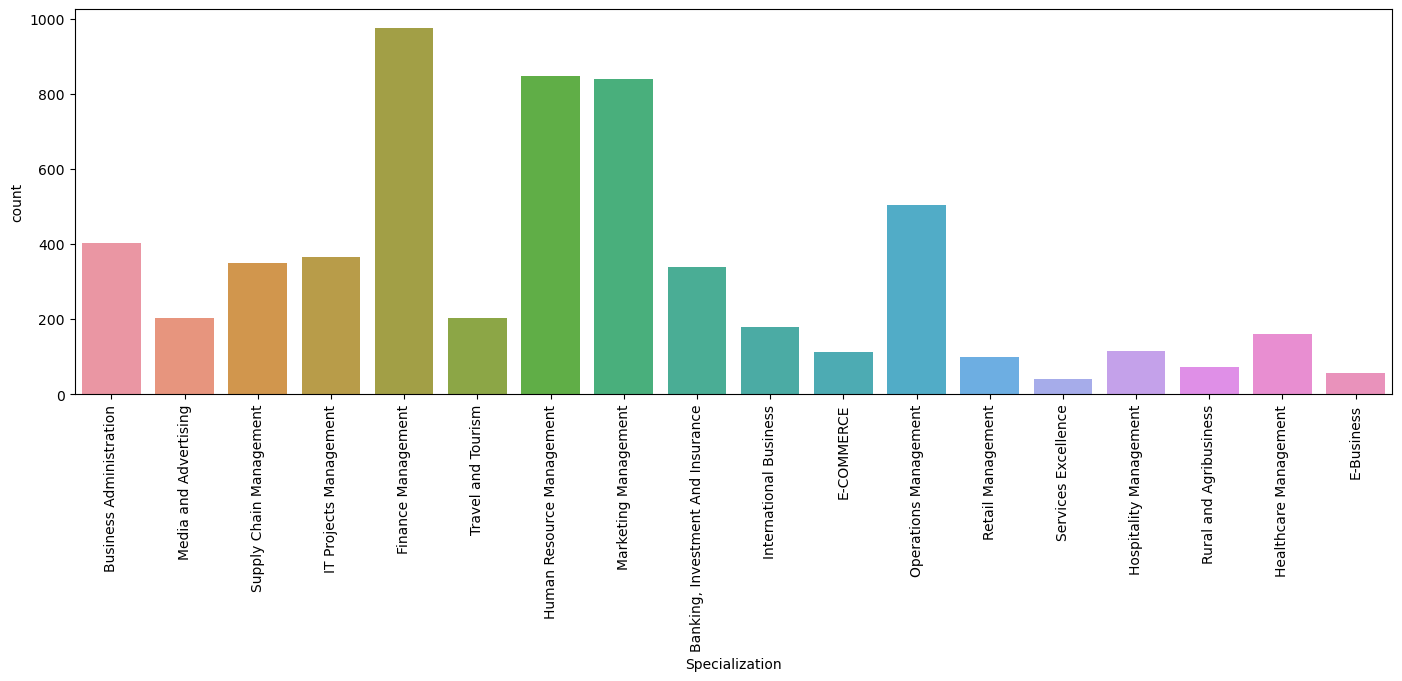

In [11]:
plt.figure(figsize = (17,5))
sns.countplot(lead_data , x ='Specialization')
plt.xticks(rotation = 90)

There is 37% missing values present in the Specialization column .It may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this.

In [12]:
# Creating a separate category called 'Others' for this 

lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan , 'Others')

###  Tags column ( 36% missing values)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

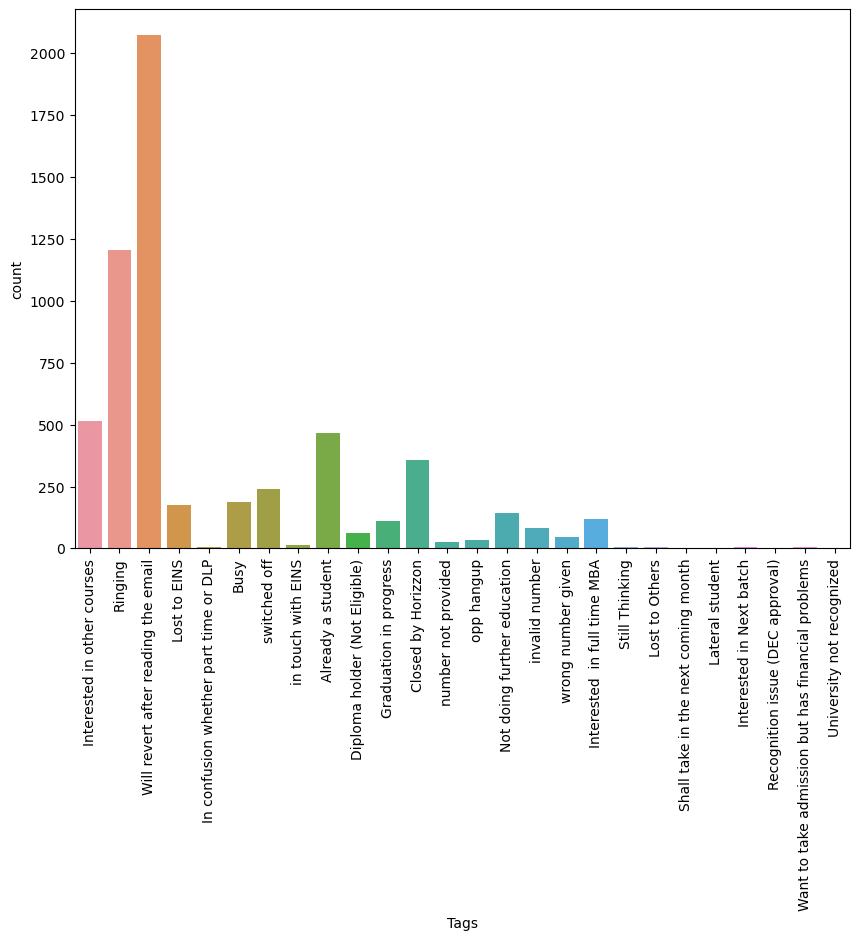

In [13]:
# visualizing 'Tags column'

plt.figure(figsize = (10,7))
sns.countplot(lead_data, x= 'Tags')
plt.xticks(rotation = 90)

Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.

In [14]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

###  Column: 'What matters most to you in choosing a course' has (29% missing values)

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

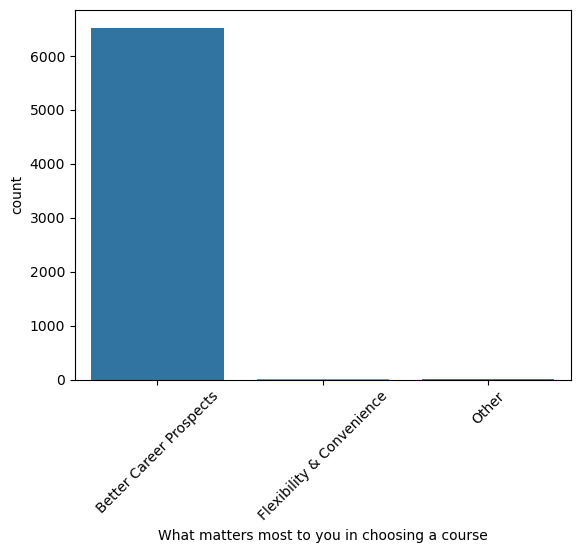

In [15]:
# Visualizing this column
sns.countplot(lead_data , x ='What matters most to you in choosing a course')
plt.xticks(rotation=45)

In [16]:
# Finding the percentage of the different categories of this column:

round(lead_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

We can see that this is highly skewed column so we can remove this column.

In [17]:
# Dropping this column 

lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

### Column: 'What is your current occupation' has (29% missing values)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

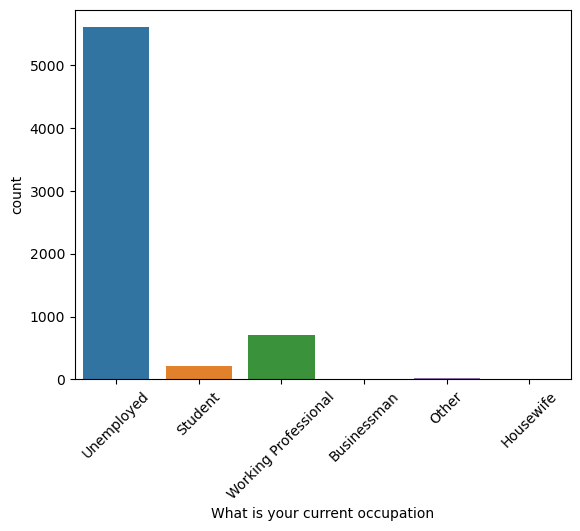

In [18]:
sns.countplot(lead_data , x= 'What is your current occupation')
plt.xticks(rotation=45)

In [19]:
# Finding the percentage of the different categories of this column:

round(lead_data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

Since the most values are 'Unemployed' , we can impute missing values in this column with this value.

In [20]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'

lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

### Column: 'Country' has ( 27% missing values)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

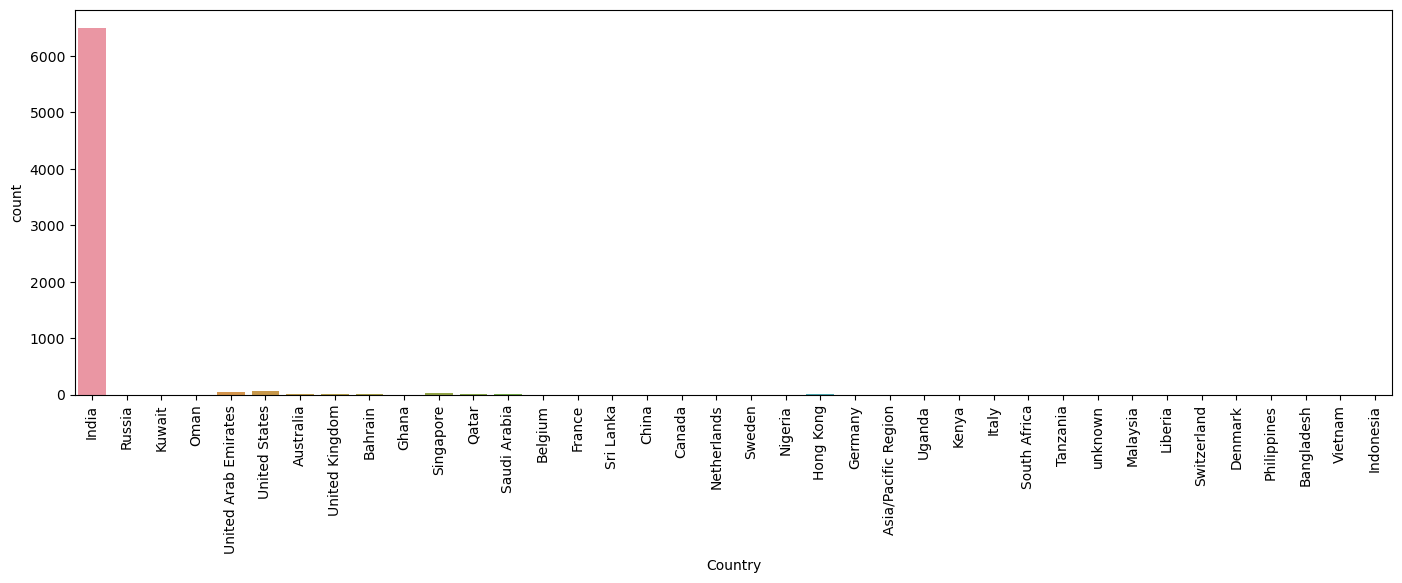

In [21]:
plt.figure(figsize=(17,5))
sns.countplot(lead_data , x='Country')
plt.xticks(rotation=90)

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. Since most values are 'India' , we can impute missing values in this column with this value.

In [22]:
# Imputing the missing data in the 'Country' column with 'India'

lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

### Column: 'City' has (40% missing values)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

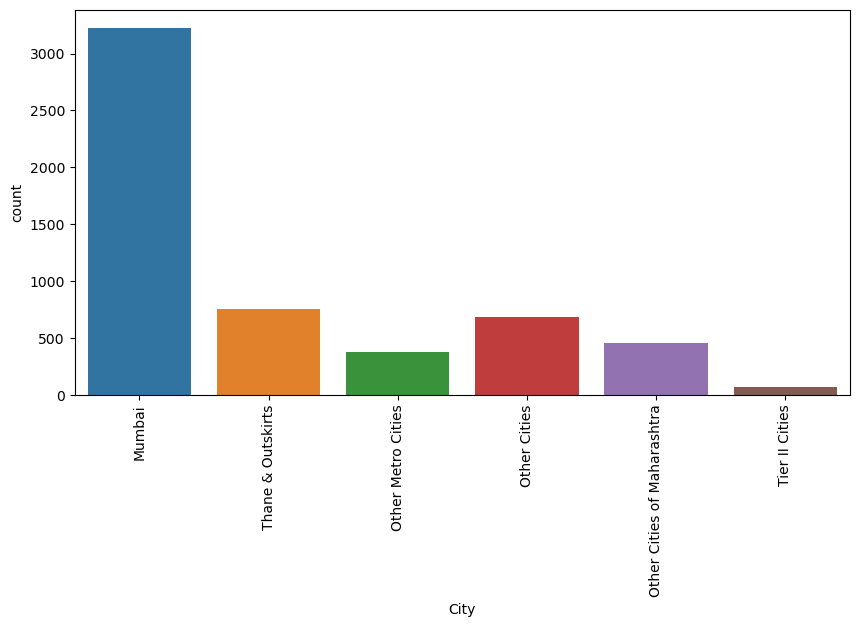

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(lead_data, x = 'City')
plt.xticks(rotation=90)

In [24]:
# Finding the percentage of the different categories of this column:

round(lead_data['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

Since most values are 'Mumbai' , we can impute missing values in this column with this value.

In [25]:
# Imputing the missing data in the 'City' column with 'Mumbai'

lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

In [26]:
# Finding the null percentages across columns after removing the above columns

round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [27]:
# Dropping the rows with null values

lead_data.dropna(inplace = True)

In [28]:
# Finding the null percentages across columns after removing the above columns

round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

no missing value in the dataset

## Step 3:  Expolatoray Data Analysis (EDA)

### Checking for duplicates

In [29]:
lead_data[lead_data.duplicated()]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, What is your current occupation, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Update me on Supply Chain Content, Get updates on DM Content, City, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 29 columns]

no duplicates 

### Univariate & Bivariate Analysis :

#### Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [30]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

Conversion rate is 38%

#### Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

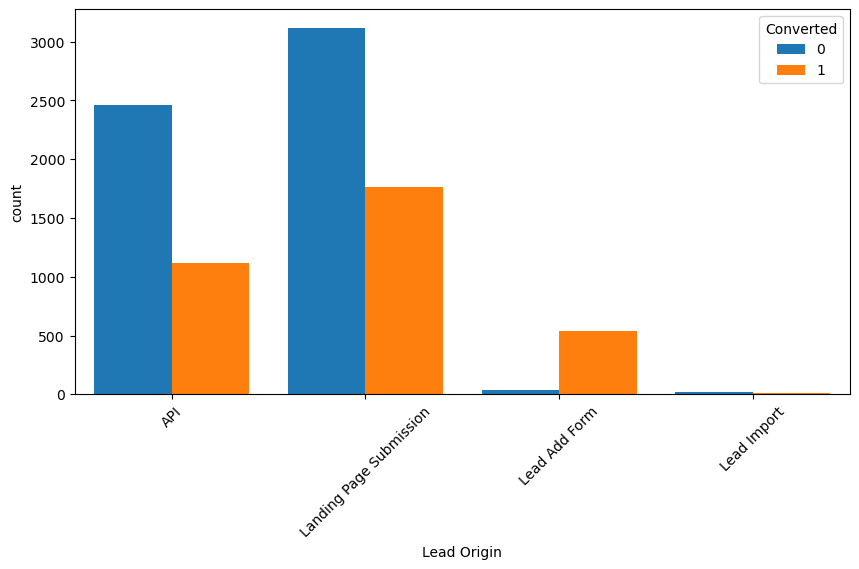

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data,  saturation = 1)
plt.xticks(rotation = 45)

#### Inference :

1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.

2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.

3. Lead Import are very less in count.


To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

#### Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

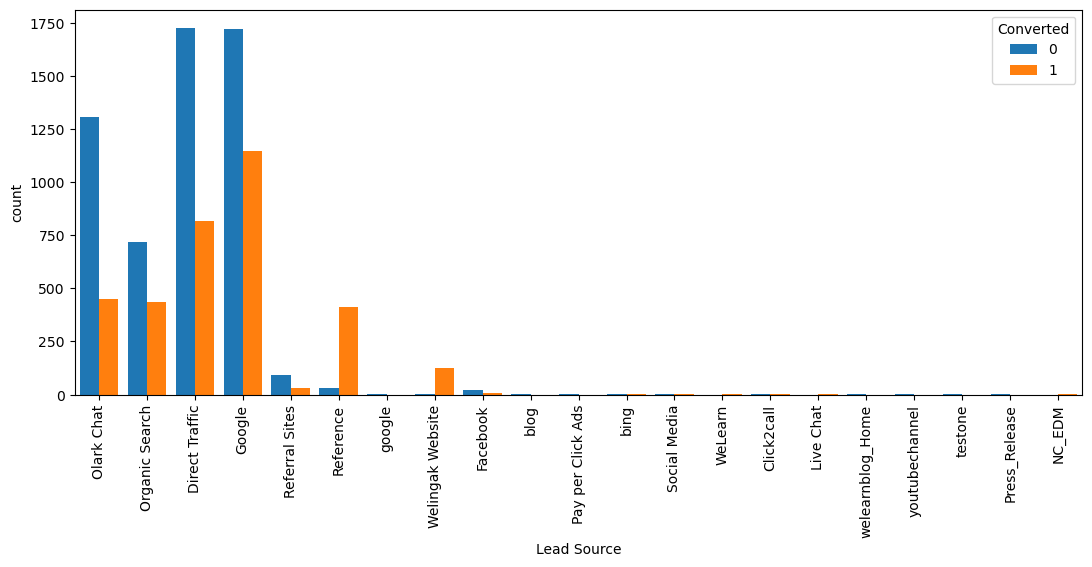

In [32]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data , saturation = 1)
plt.xticks(rotation = 90)

In [33]:
# Need to replace 'google' with 'Google'

lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [34]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.

lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

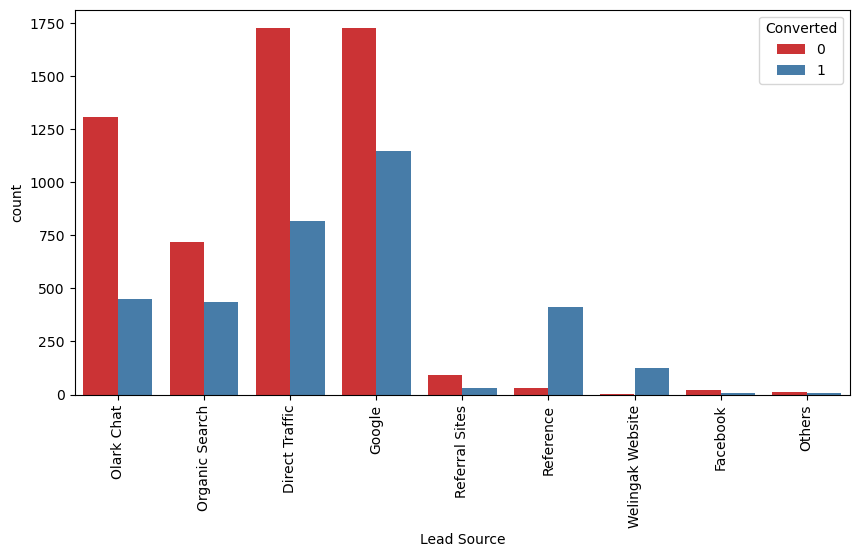

In [35]:
# Visualizing again

plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference:

1. Google and Direct traffic generates maximum number of leads.

2. Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

#### Do Not Email

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

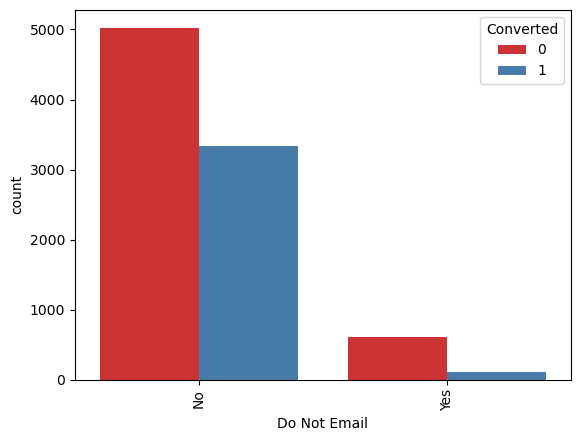

In [36]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Most entries are 'No'. No Inference can be drawn with this parameter.

#### Do Not Call

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

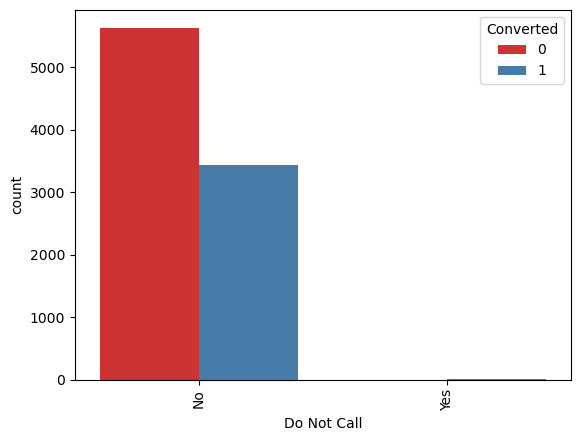

In [37]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### TotalVisits

In [38]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: >

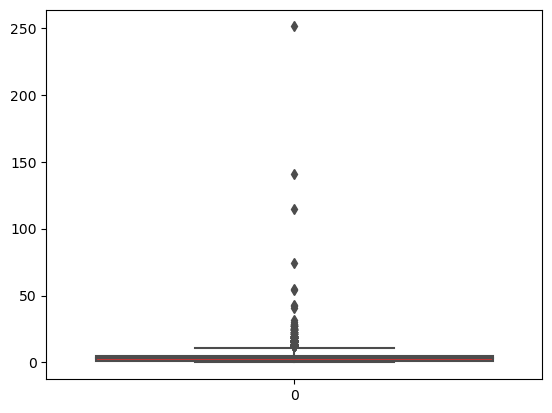

In [39]:
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [40]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: >

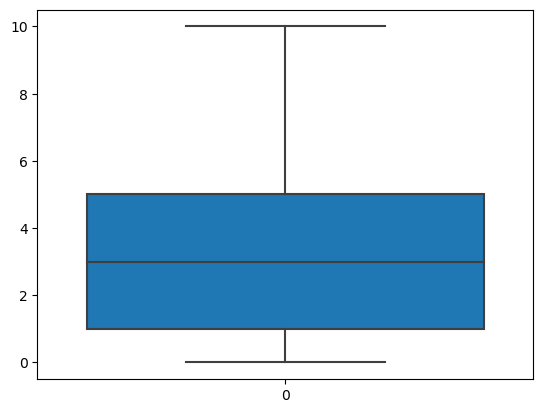

In [41]:
# Visualizing again

sns.boxplot(lead_data['TotalVisits'],orient='vert', saturation = 1)

<Axes: xlabel='Converted', ylabel='TotalVisits'>

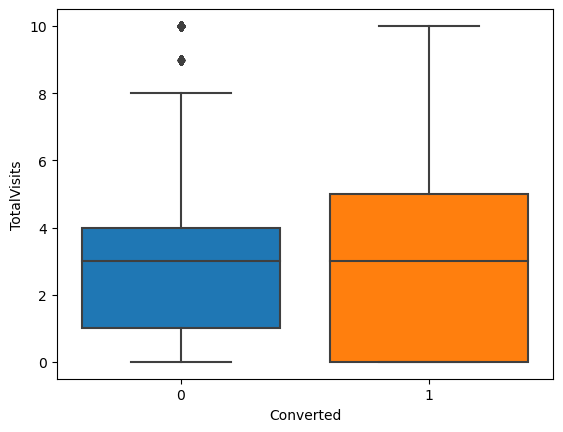

In [42]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data, saturation = 1)

* Median for converted and not converted leads are the same.

Nothing can be concluded on the basis of Total Visits.

#### Last Activity

In [43]:
lead_data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

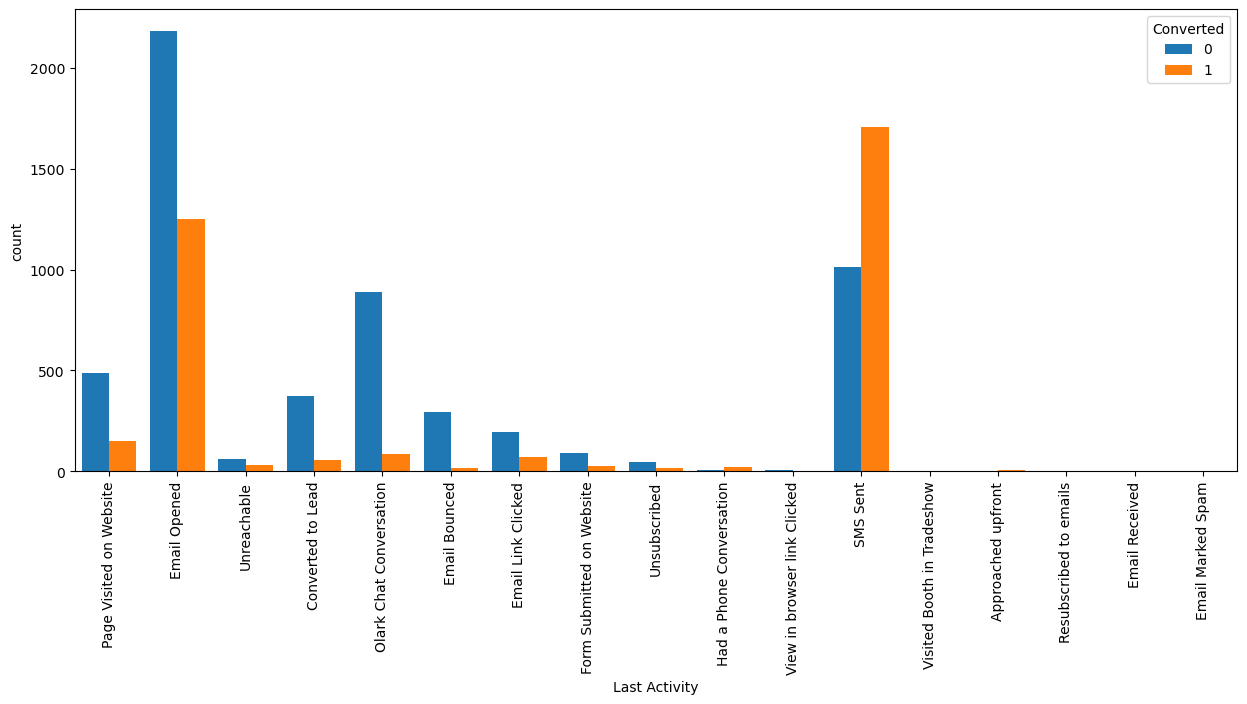

In [44]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

In [45]:
# We can club the last activities to "Other_Activity" which are having less data.

lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

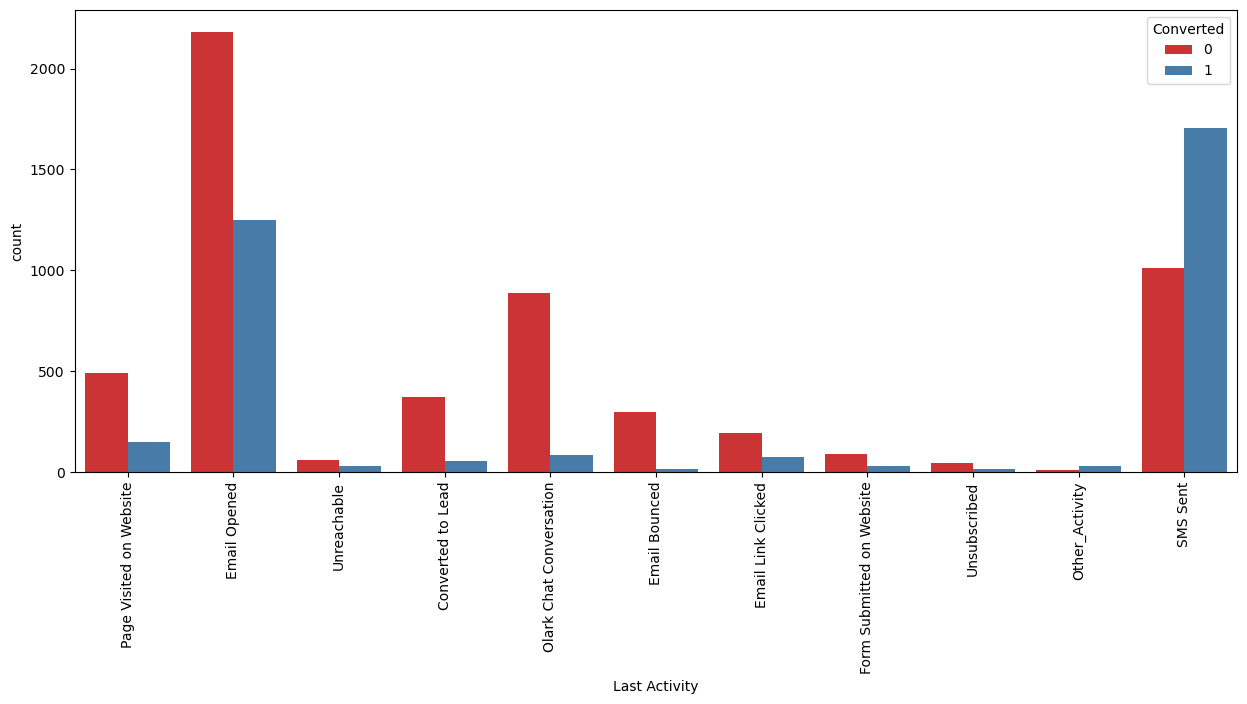

In [46]:
# Visualizing again

plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

* Most of the lead have their Email opened as their last activity.
* Conversion rate for leads with last activity as SMS Sent is almost 60%.

#### Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

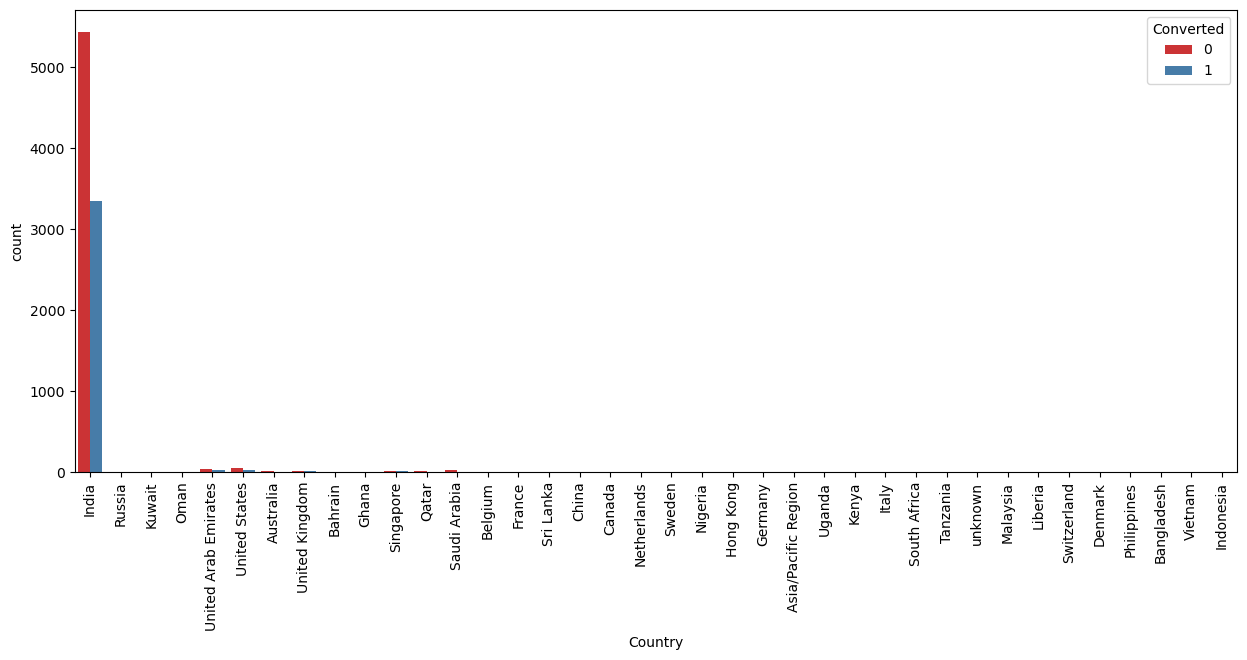

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Most values are 'India' no such inference can be drawn

#### Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

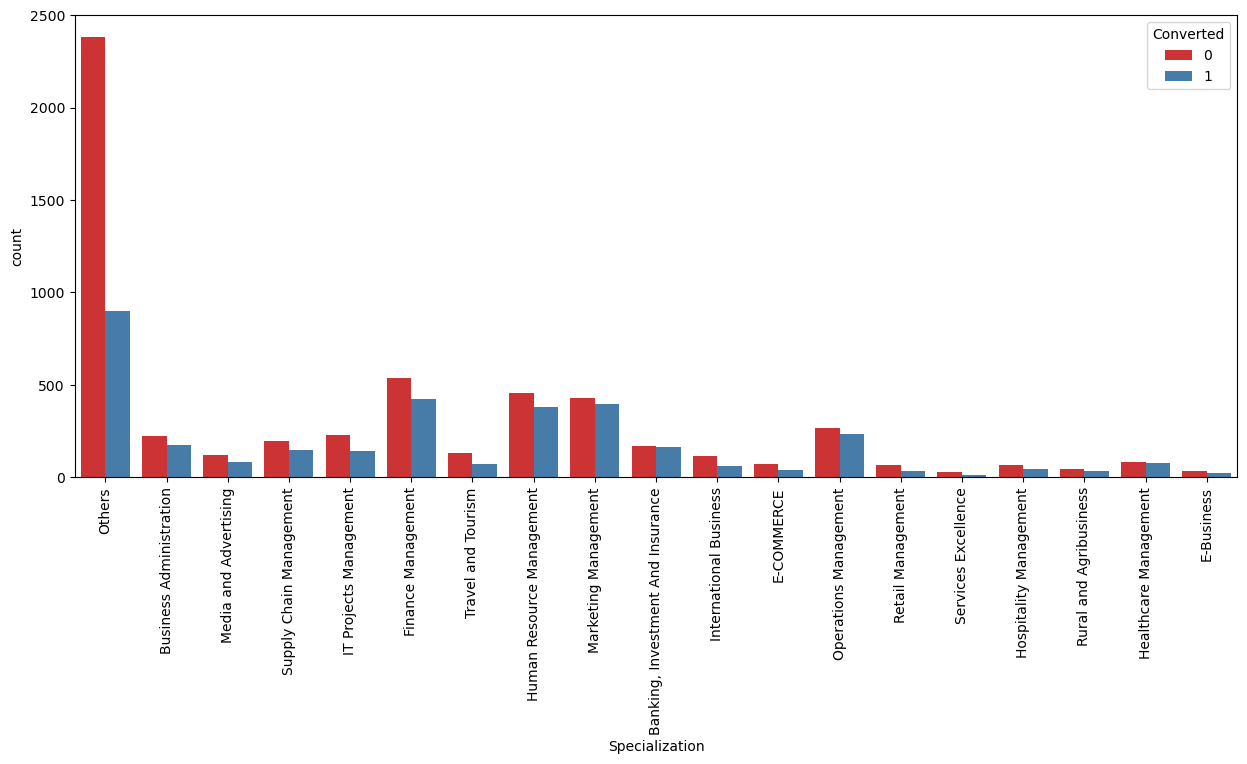

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Focus should be more on the Specialization with high conversion rate.



#### What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

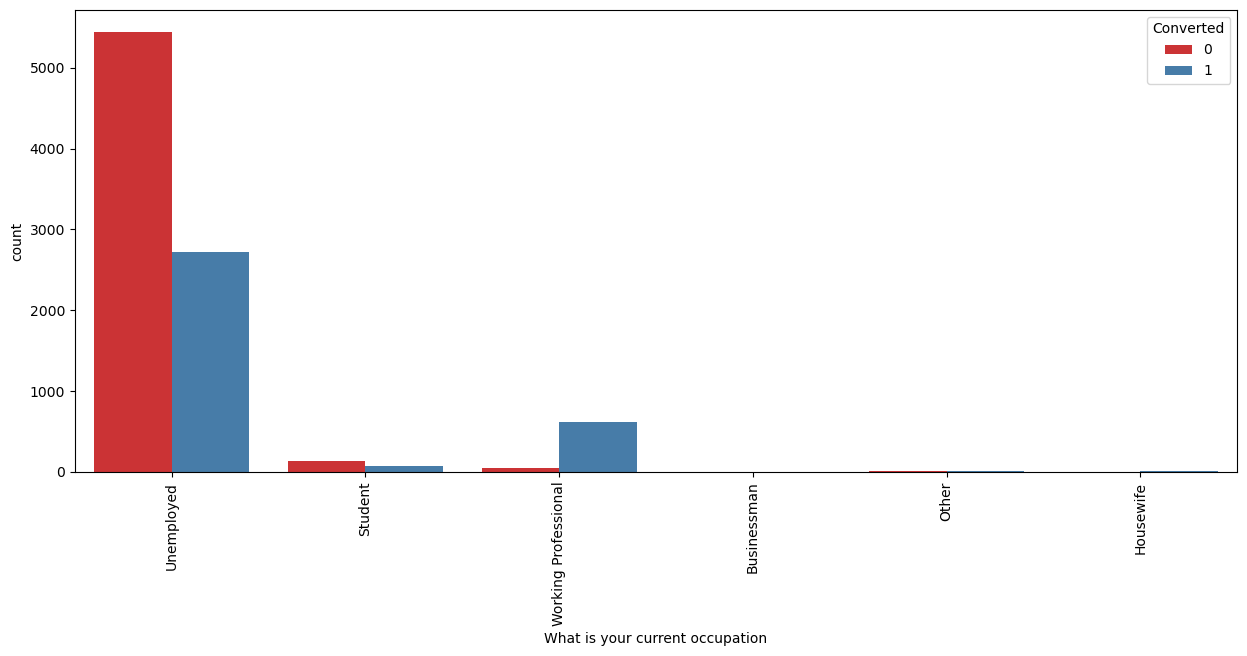

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

* Working Professionals going for the course have high chances of joining it.

* Unemployed leads are the most in numbers but has around 30-35% conversion rate.

#### Search

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

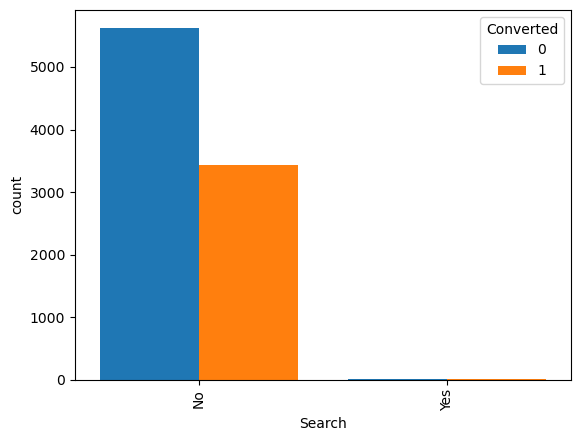

In [50]:
sns.countplot(x = "Search", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

#### Magazine

(array([0]), [Text(0, 0, 'No')])

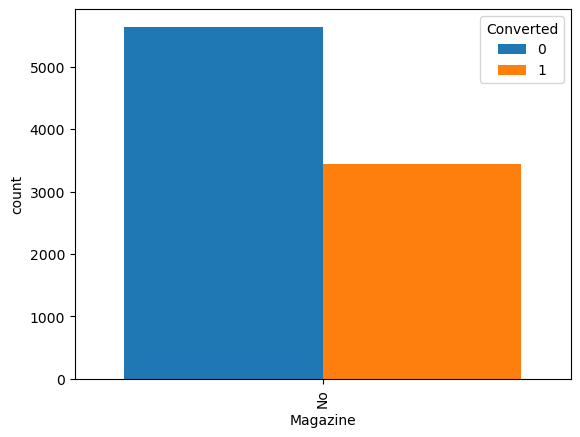

In [51]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

#### Newspaper Article

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

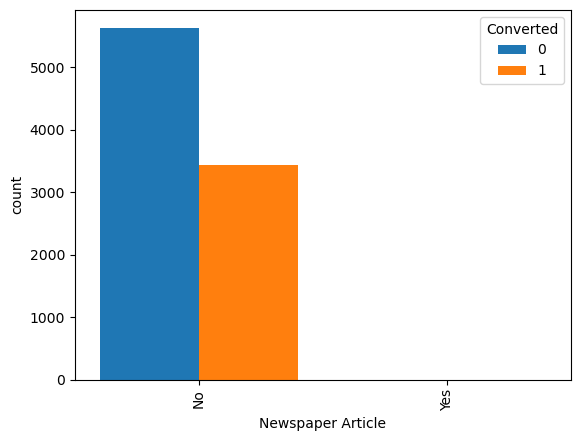

In [52]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

#### X Education Forums

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

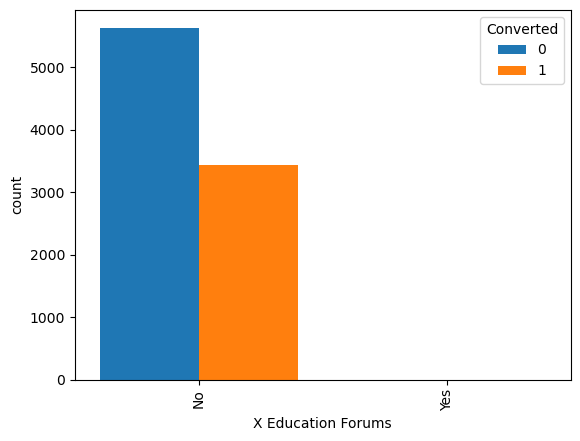

In [53]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

#### Newspaper

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

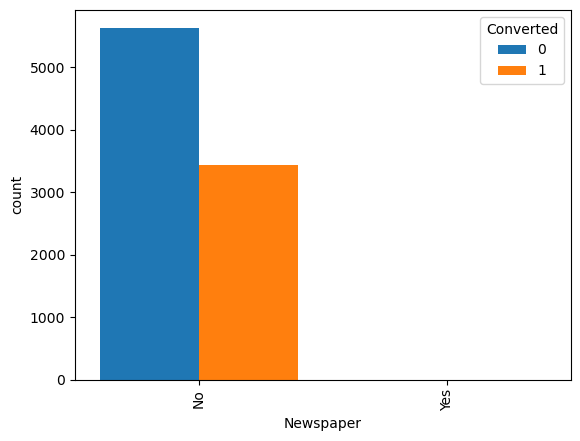

In [54]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

#### Digital Advertisement

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

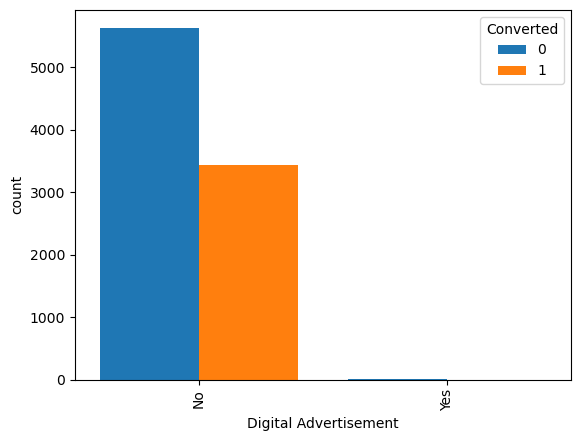

In [55]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

#### Through Rcommendations

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

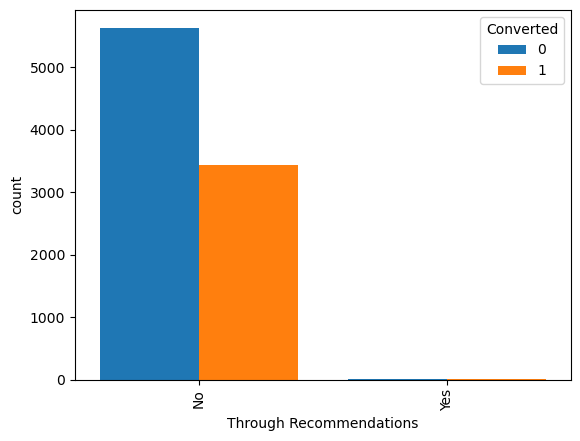

In [56]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

#### Receive More Updates About Our Courses

(array([0]), [Text(0, 0, 'No')])

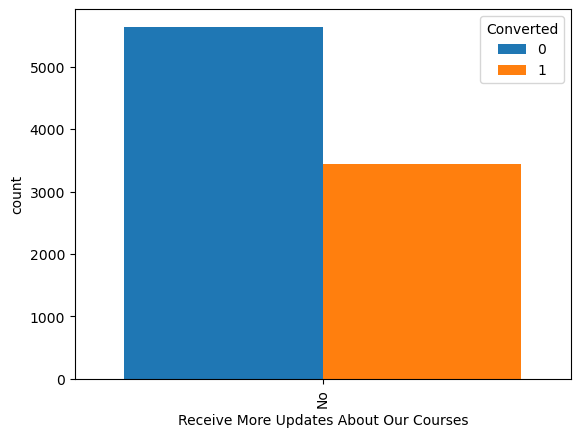

In [57]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

#### Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

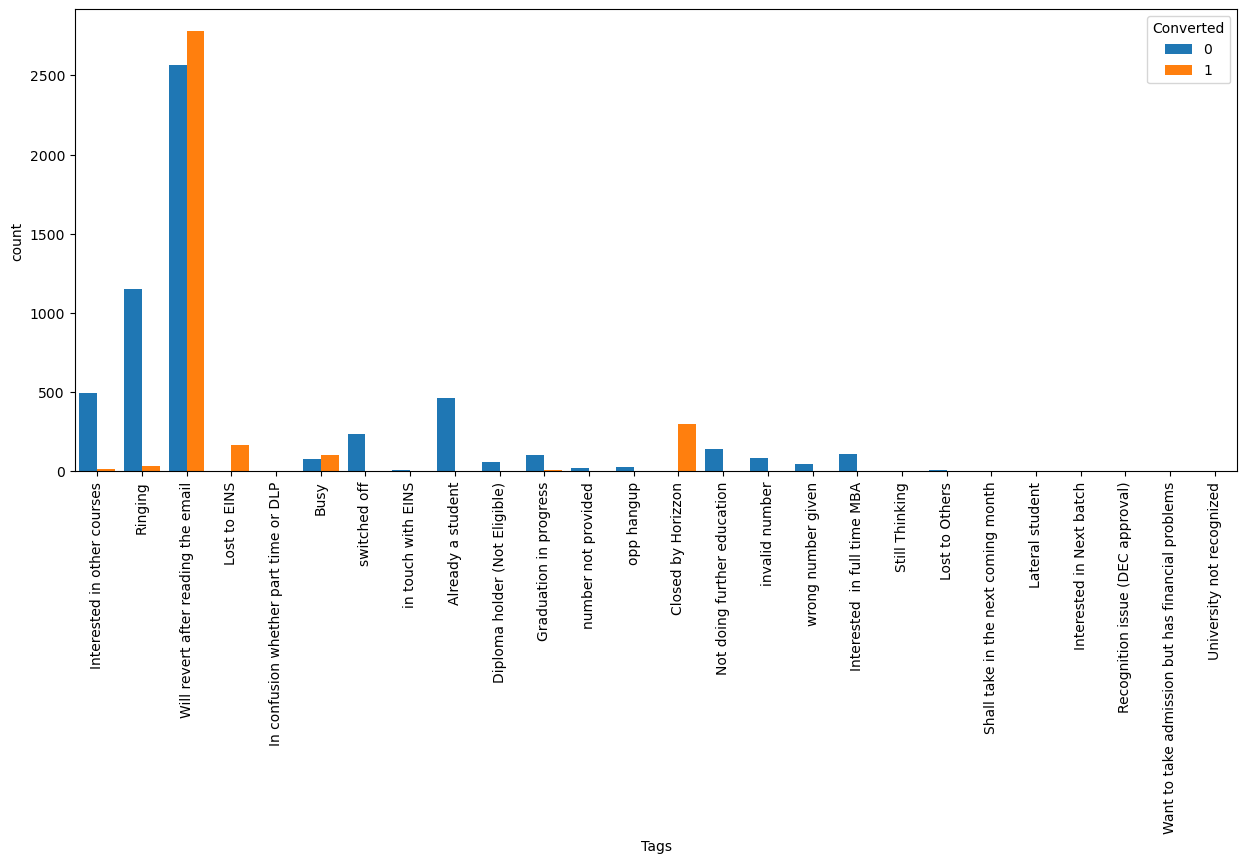

In [58]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

Since this is a column which is generated by the sales team for their analysis , so this is not available for model building . So we will need to remove this column before building the model.

#### Update me on Supply Chain Content

(array([0]), [Text(0, 0, 'No')])

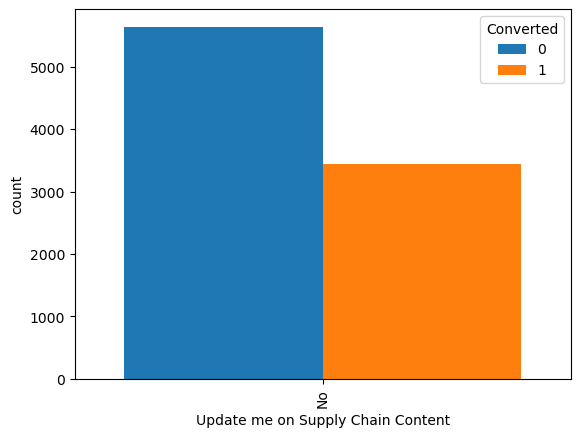

In [59]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

#### Get updates on DM Content

(array([0]), [Text(0, 0, 'No')])

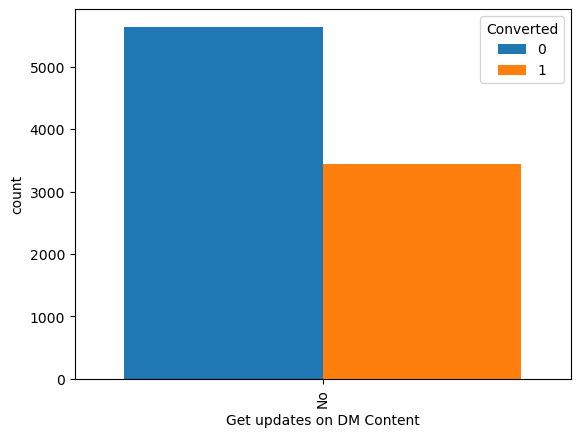

In [60]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_data, saturation = 1 )
plt.xticks(rotation = 90)

#### City

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

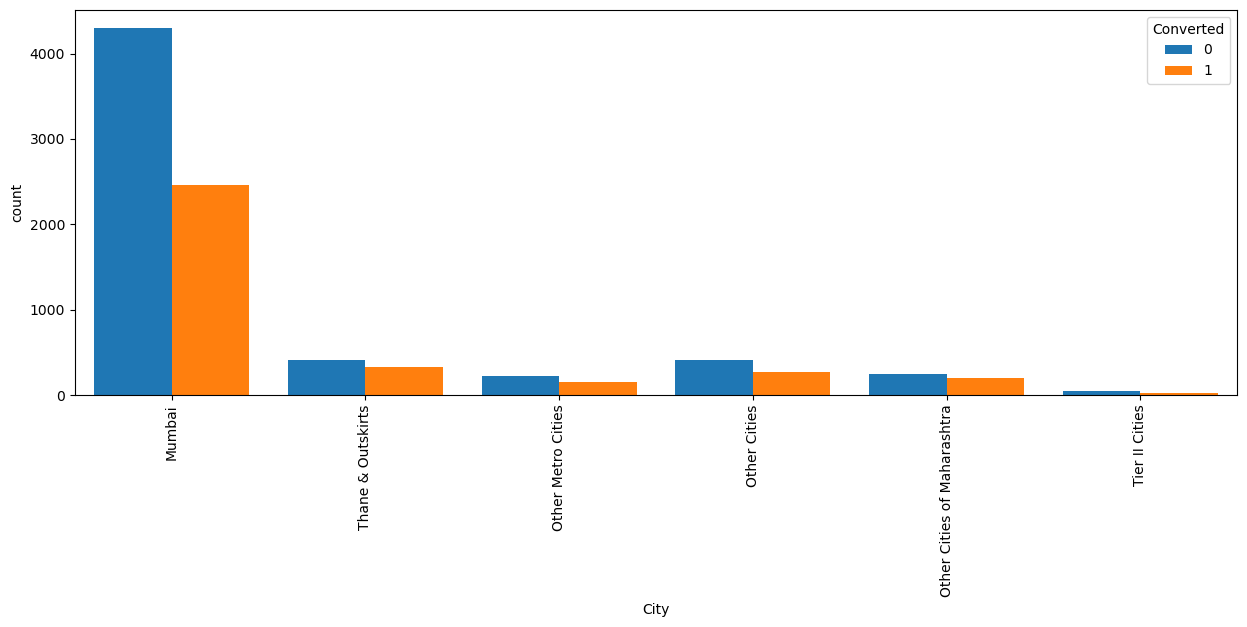

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

#### I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

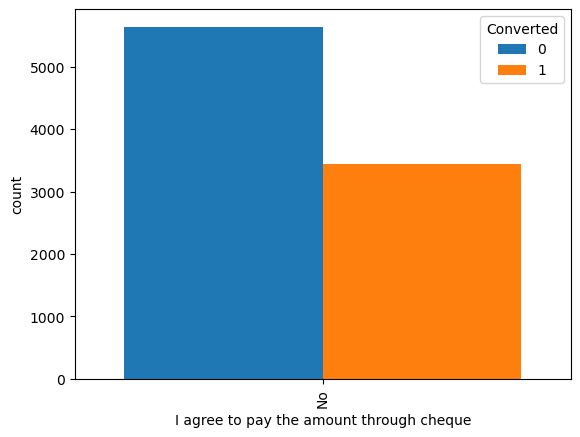

In [62]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

####  A free copy of Mastering The Interview

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

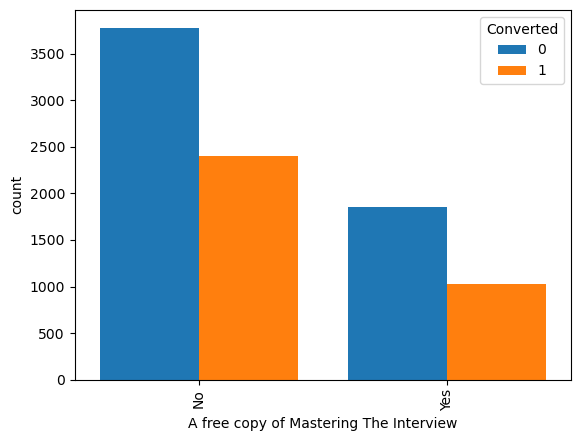

In [63]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

#### Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

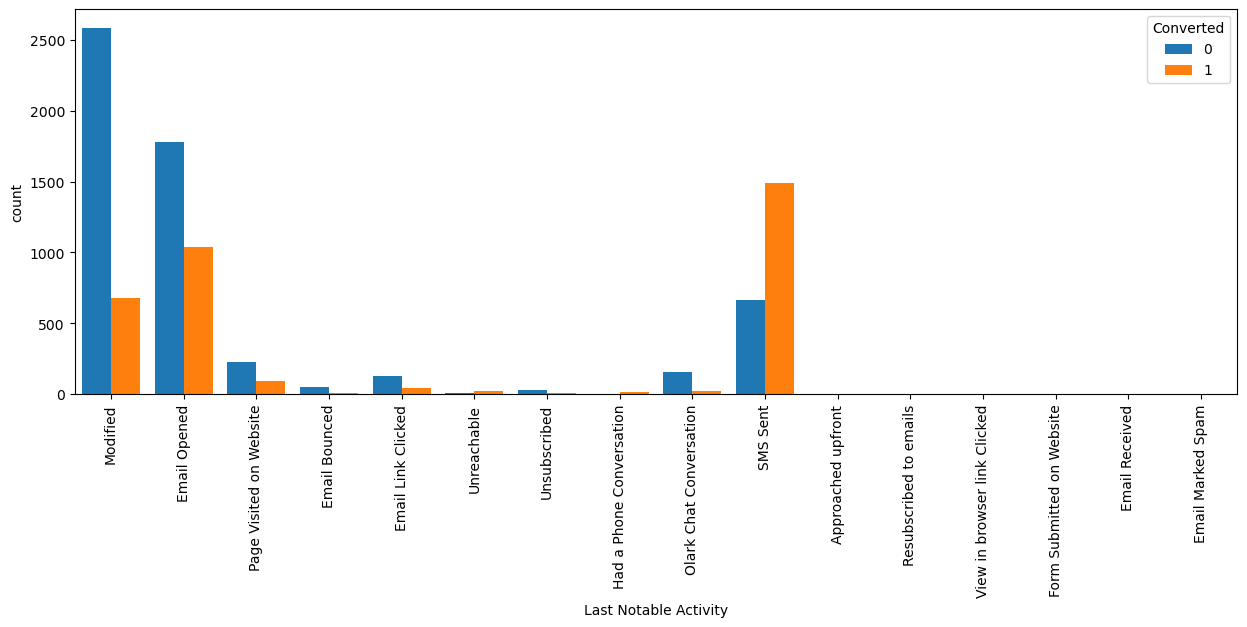

In [64]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data, saturation = 1)
plt.xticks(rotation = 90)

Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [65]:
lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [66]:
lead_data.shape

(9074, 14)

In [67]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

## Step 4: Data Preparation

#### 1) Converting some binary variables (Yes/No) to 1/0

In [68]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

#### 2) Creating Dummy variables for the categorical features:

'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [69]:
# Creating a dummy variable for the categorical variables and dropping the first one.

dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  ...  \
0                      0                           0  ...   
1                      0                           0  ...   
2                      0                           0  ...   
3                      0                           0  ...   
4                      0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1         

In [70]:
# Concatenating the dummy_data to the lead_data dataframe

lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

   ... Last Notable Activity_Form Submitted on Website  \
0  ...                                               0   
1  ...                                               0   
2  ...                                               0   
3  ...                                               0   
4  ...                                               0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              1   
1                              0   
2                              0   
3                              1   
4                              1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                            

#### Dropping the columns for which dummies were created

In [71]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [72]:
lead_data.head()

Prospect ID  Do Not Email  Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
4  3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  ...  \
0                        0  ...   
1                        0  ...   
2                        0  ...   
3                        0  ...   
4                        0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Acti

#### 3) Splitting the data into train and test set

In [73]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X

X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  ...  Last Notable Activity_Form Submitted on Website  \
0                   0  ...                                                0   
1                   0  ...                                                0   
2                   0  ...                                                0   
3                   0  ...                                                0   
4                   1  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0           

In [74]:
# Putting target variable to y

y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [75]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### 4) Scaling the features

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0    -0.432779                    -0.160255   
1012             1            0    -0.432779                    -0.540048   
9226             0            0    -1.150329                    -0.888650   
4750             0            0    -0.432779                     1.643304   
7987             0            0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.179666                                    1   
1012             -0.179666                                    1   
9226             -1.132538                                    0   
4750             -0.179666                                    1   
7987              0.058552                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Facebook  Lead Source_Google  ...  \
3009                     0                   0  ...   
1012                     0                   0  ...   
9226                     0                   0  ...   
4750                     0                   0  ...   
7987                     0                   0  ...   

      Last Notable Activity_Form Submitted on Website  \
3009                                                0   
1012                                                0   
9226                                                0   
4750                                                0   
7987                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3009                                               0   
1012                                               0   
9226                                               0   
4750                                               0   
7987                                               0   

      Last Notable Activity_Modified  \
3009                               0   
1012                               0   
9226                               1   
4750                               0   
7987                               1   

      Last Notable Activity_Olark Chat Conversation  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Page Visited on Website  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Resubscribed to emails  \
3009                                             0   
1012                                             0   
9226                                             0   
4750                                             0   
7987                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3009                               0                                  0   
1012                               0                                  0   
9226                               0                                  0   
4750                               1                                  0   
7987                               0                                  0   

      Last Notable Activity_Unsubscribed  \
3009                                   0   
1

In [77]:
# Checking the Lead Conversion rate

Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

## Step 5:  Feature Selection Using RFE

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), step =20)             
rfe = rfe.fit(X_train, y_train)

In [79]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', False, 2),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activi

In [81]:
# Viewing columns selected by RFE

cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'La

## Step 6: Model Building

##### Assessing the model with StatsModels

#### Model-1

In [82]:
import statsmodels.api as sm

In [83]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.0
Date:                Fri, 13 Oct 2023   Deviance:                       5136.1
Time:                        15:39:49   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1595      1.849      0.627      0.531      -2.464       4.783
Do Not Email                                            -1.6650      0.210     -7.947      0.000      -2.076      -1.254
Do Not Call                                             21.6068    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
Total Time Spent on Website                              1.1097      0.041     27.005      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.1139      0.130     -8.542      0.000      -1.369      -0.858
Lead Origin_Lead Add Form                                1.4962      0.890      1.681      0.093      -0.249       3.241
Lead Origin_Lead Import                                  0.9100      0.477      1.909      0.056      -0.024       1.844
Lead Source_Olark Chat                                   1.1064      0.125      8.879      0.000       0.862       1.351
Lead Source_Reference                                    1.8439      0.914      2.016      0.044       0.052       3.636
Lead Source_Welingak Website                             4.4179      1.147      3.850      0.000       2.169       6.667
Last Activity_Email Opened                               0.6155      0.179      3.439      0.001       0.265       0.966
Last Activity_Olark Chat Conversation                   -0.6688      0.222     -3.017      0.003      -1.103      -0.234
Last Activity_Other_Activity                             2.0861      0.603      3.459      0.001       0.904       3.268
Last Activity_SMS Sent                                   1.0678      0.181      5.891      0.000       0.713       1.423
Last Activity_Unreachable                                0.2513      0.507      0.496      0.620      -0.742       1.245
Last Activity_Unsubscribed                               1.3524      1.124      1.203      0.229      -0.850       3.555
Specialization_Hospitality Management                   -0.4211      0.328     -1.283      0.200      -1.064       0.222
Specialization_Others                                   -1.1446      0.127     -9.033      0.000      -1.393      -0.896
What is your current occupation_Housewife               21.7391   1.53e+04      0.001      0.999   -2.99e+04       3e+04
What is your current occupation_Student                 -0.5757      0.685     -0.840      0.401      -1.918       0.767
What is your current occupation_Unemployed              -1.0259      0.646     -1.587      0.112      -2.293       0.241
What is your current occupation_Working Professional     1.5985      0.672      2.377      0.017       0.281       2.916
City_Tier II Cities                                     -0

Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [84]:
# Dropping the column 'What is your current occupation_Housewife'

col1 = cols.drop('What is your current occupation_Housewife')

### Model - 2

In [85]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.0
Date:                Fri, 13 Oct 2023   Deviance:                       5139.9
Time:                        15:39:49   Pearson chi2:                 6.39e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6482      1.832      0.900      0.368      -1.942       5.238
Do Not Email                                            -1.6688      0.210     -7.959      0.000      -2.080      -1.258
Do Not Call                                             20.6106      2e+04      0.001      0.999   -3.93e+04    3.93e+04
Total Time Spent on Website                              1.1086      0.041     26.996      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.1073      0.130     -8.500      0.000      -1.363      -0.852
Lead Origin_Lead Add Form                                1.4990      0.890      1.684      0.092      -0.245       3.243
Lead Origin_Lead Import                                  0.9113      0.476      1.912      0.056      -0.023       1.845
Lead Source_Olark Chat                                   1.1066      0.125      8.880      0.000       0.862       1.351
Lead Source_Reference                                    1.8464      0.914      2.020      0.043       0.054       3.638
Lead Source_Welingak Website                             4.4158      1.147      3.849      0.000       2.167       6.665
Last Activity_Email Opened                               0.6201      0.179      3.464      0.001       0.269       0.971
Last Activity_Olark Chat Conversation                   -0.6663      0.222     -3.002      0.003      -1.101      -0.231
Last Activity_Other_Activity                             2.0909      0.603      3.467      0.001       0.909       3.273
Last Activity_SMS Sent                                   1.0720      0.181      5.913      0.000       0.717       1.427
Last Activity_Unreachable                                0.2554      0.507      0.504      0.614      -0.738       1.249
Last Activity_Unsubscribed                               1.3587      1.124      1.209      0.227      -0.844       3.561
Specialization_Hospitality Management                   -0.4211      0.328     -1.283      0.199      -1.064       0.222
Specialization_Others                                   -1.1409      0.127     -9.011      0.000      -1.389      -0.893
What is your current occupation_Student                 -1.0720      0.636     -1.686      0.092      -2.318       0.174
What is your current occupation_Unemployed              -1.5215      0.594     -2.561      0.010      -2.686      -0.357
What is your current occupation_Working Professional     1.1027      0.622      1.772      0.076      -0.117       2.322
City_Tier II Cities                                     -0.5673      0.456     -1.245      0.213      -1.460       0.326
Last Notable Activity_Email Bounced                      0

Since Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column.

In [86]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

### Model - 3

In [87]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.1
Date:                Fri, 13 Oct 2023   Deviance:                       5140.1
Time:                        15:39:50   Pearson chi2:                 6.39e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2626      1.174      1.928      0.054      -0.038       4.563
Do Not Email                                            -1.6715      0.210     -7.965      0.000      -2.083      -1.260
Do Not Call                                             20.6108      2e+04      0.001      0.999   -3.93e+04    3.93e+04
Total Time Spent on Website                              1.1084      0.041     26.990      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.1077      0.130     -8.504      0.000      -1.363      -0.852
Lead Origin_Lead Add Form                                1.4987      0.890      1.684      0.092      -0.246       3.243
Lead Origin_Lead Import                                  0.9107      0.476      1.911      0.056      -0.023       1.845
Lead Source_Olark Chat                                   1.1061      0.125      8.876      0.000       0.862       1.350
Lead Source_Reference                                    1.8453      0.914      2.018      0.044       0.053       3.637
Lead Source_Welingak Website                             4.4164      1.147      3.849      0.000       2.168       6.665
Last Activity_Email Opened                               0.6216      0.179      3.473      0.001       0.271       0.972
Last Activity_Olark Chat Conversation                   -0.6646      0.222     -2.995      0.003      -1.100      -0.230
Last Activity_Other_Activity                             2.1343      0.594      3.593      0.000       0.970       3.299
Last Activity_SMS Sent                                   1.0737      0.181      5.923      0.000       0.718       1.429
Last Activity_Unreachable                                0.2570      0.507      0.507      0.612      -0.736       1.250
Last Activity_Unsubscribed                               1.3618      1.124      1.212      0.226      -0.841       3.564
Specialization_Hospitality Management                   -0.4208      0.328     -1.282      0.200      -1.064       0.222
Specialization_Others                                   -1.1413      0.127     -9.015      0.000      -1.389      -0.893
What is your current occupation_Student                 -1.0724      0.636     -1.687      0.092      -2.319       0.174
What is your current occupation_Unemployed              -1.5220      0.594     -2.562      0.010      -2.686      -0.358
What is your current occupation_Working Professional     1.1018      0.622      1.771      0.077      -0.118       2.321
City_Tier II Cities                                     -0.5668      0.456     -1.244      0.213      -1.460       0.326
Last Notable Activity_Email Bounced                     -0

Since Pvalue of 'What is your current occupation_Student' is very high, we can drop this column.

In [88]:
col1 = col1.drop('What is your current occupation_Student')

### Model - 4

In [89]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.6
Date:                Fri, 13 Oct 2023   Deviance:                       5143.1
Time:                        15:39:50   Pearson chi2:                 6.39e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3531      1.039      1.302      0.193      -0.683       3.389
Do Not Email                                            -1.6668      0.210     -7.953      0.000      -2.078      -1.256
Do Not Call                                             20.5963      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1092      0.041     27.017      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.1210      0.130     -8.623      0.000      -1.376      -0.866
Lead Origin_Lead Add Form                                1.4926      0.890      1.677      0.093      -0.252       3.237
Lead Origin_Lead Import                                  0.9039      0.477      1.896      0.058      -0.031       1.838
Lead Source_Olark Chat                                   1.1010      0.125      8.842      0.000       0.857       1.345
Lead Source_Reference                                    1.8514      0.914      2.025      0.043       0.060       3.643
Lead Source_Welingak Website                             4.4219      1.147      3.854      0.000       2.173       6.671
Last Activity_Email Opened                               0.6153      0.179      3.441      0.001       0.265       0.966
Last Activity_Olark Chat Conversation                   -0.6670      0.222     -3.011      0.003      -1.101      -0.233
Last Activity_Other_Activity                             2.1311      0.594      3.587      0.000       0.967       3.296
Last Activity_SMS Sent                                   1.0692      0.181      5.901      0.000       0.714       1.424
Last Activity_Unreachable                                0.2519      0.507      0.497      0.619      -0.742       1.246
Last Activity_Unsubscribed                               1.3542      1.124      1.205      0.228      -0.848       3.557
Specialization_Hospitality Management                   -0.4286      0.328     -1.307      0.191      -1.072       0.214
Specialization_Others                                   -1.1537      0.126     -9.125      0.000      -1.401      -0.906
What is your current occupation_Unemployed              -0.5983      0.214     -2.801      0.005      -1.017      -0.180
What is your current occupation_Working Professional     2.0243      0.284      7.125      0.000       1.467       2.581
City_Tier II Cities                                     -0.5673      0.455     -1.246      0.213      -1.460       0.325
Last Notable Activity_Email Bounced                     -0.5835      1.152     -0.506      0.613      -2.842       1.675
Last Notable Activity_Email Link Clicked                -1

Since Pvalue of 'Lead Origin_Lead Add Form' is very high, we can drop this column.

In [90]:
col1 = col1.drop('Lead Origin_Lead Add Form')

### Model - 5

In [91]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.1
Date:                Fri, 13 Oct 2023   Deviance:                       5146.2
Time:                        15:39:50   Pearson chi2:                 6.39e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3694      1.039      1.318      0.187      -0.667       3.405
Do Not Email                                            -1.6690      0.210     -7.964      0.000      -2.080      -1.258
Do Not Call                                             20.5878      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1072      0.041     27.012      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.1397      0.130     -8.790      0.000      -1.394      -0.886
Lead Origin_Lead Import                                  0.8876      0.477      1.861      0.063      -0.047       1.822
Lead Source_Olark Chat                                   1.0942      0.124      8.807      0.000       0.851       1.338
Lead Source_Reference                                    3.3294      0.244     13.665      0.000       2.852       3.807
Lead Source_Welingak Website                             5.9058      0.731      8.079      0.000       4.473       7.339
Last Activity_Email Opened                               0.6169      0.179      3.454      0.001       0.267       0.967
Last Activity_Olark Chat Conversation                   -0.6725      0.221     -3.038      0.002      -1.106      -0.239
Last Activity_Other_Activity                             2.1277      0.594      3.583      0.000       0.964       3.292
Last Activity_SMS Sent                                   1.0663      0.181      5.890      0.000       0.711       1.421
Last Activity_Unreachable                                0.2496      0.507      0.492      0.622      -0.744       1.243
Last Activity_Unsubscribed                               1.3529      1.124      1.204      0.229      -0.849       3.555
Specialization_Hospitality Management                   -0.4302      0.328     -1.311      0.190      -1.073       0.213
Specialization_Others                                   -1.1660      0.126     -9.233      0.000      -1.414      -0.918
What is your current occupation_Unemployed              -0.5953      0.214     -2.787      0.005      -1.014      -0.177
What is your current occupation_Working Professional     2.0241      0.284      7.122      0.000       1.467       2.581
City_Tier II Cities                                     -0.5674      0.455     -1.246      0.213      -1.460       0.325
Last Notable Activity_Email Bounced                     -0.5831      1.152     -0.506      0.613      -2.841       1.675
Last Notable Activity_Email Link Clicked                -1.3641      1.042     -1.309      0.191      -3.407       0.679
Last Notable Activity_Email Opened                      -1

#### Checking for VIF values:

In [92]:
# Check for the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
16         What is your current occupation_Unemployed  34.22
21                 Last Notable Activity_Email Opened  22.05
22                     Last Notable Activity_Modified  19.68
26                     Last Notable Activity_SMS Sent  18.03
8                          Last Activity_Email Opened   8.87
11                             Last Activity_SMS Sent   7.38
3                 Lead Origin_Landing Page Submission   7.27
15                              Specialization_Others   4.67
17  What is your current occupation_Working Profes...   3.93
28                 Last Notable Activity_Unsubscribed   3.81
13                         Last Activity_Unsubscribed   3.62
24      Last Notable Activity_Page Visited on Website   2.61
9               Last Activity_Olark Chat Conversation   2.48
5                              Lead Source_Olark Chat   2.35
23      Last Notable Activity_Olark Chat Conversation   2.26
20           Last Notable Activity_Email Link Clicked   1.88
27                  Last Notable Activity_Unreachable   1.79
12                          Last Activity_Unreachable   1.68
6                               Lead Source_Reference   1.58
19                Last Notable Activity_Email Bounced   1.48
0                                        Do Not Email   1.45
2                         Total Time Spent on Website   1.34
10                       Last Activity_Other_Activity   1.14
7                        Lead Source_Welingak Website   1.12
25       Last Notable Activity_Resubscribed to emails   1.03
4                             Lead Origin_Lead Import   1.03
29  Last Notable Activity_View in browser link Cli...   1.03
18                                City_Tier II Cities   1.02
14              Specialization_Hospitality Management   1.02
1                                         Do Not Call   1.01

In [93]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF

col1 = col1.drop('What is your current occupation_Unemployed')

### Model - 6

In [94]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.9
Date:                Fri, 13 Oct 2023   Deviance:                       5153.8
Time:                        15:39:52   Pearson chi2:                 6.41e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4064
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7851      1.017      0.772      0.440      -1.208       2.778
Do Not Email                                            -1.6621      0.210     -7.921      0.000      -2.073      -1.251
Do Not Call                                             20.5534      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1072      0.041     27.024      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1439      0.130     -8.815      0.000      -1.398      -0.890
Lead Origin_Lead Import                                  0.8677      0.477      1.819      0.069      -0.067       1.802
Lead Source_Olark Chat                                   1.1001      0.124      8.853      0.000       0.857       1.344
Lead Source_Reference                                    3.3412      0.243     13.730      0.000       2.864       3.818
Lead Source_Welingak Website                             5.8972      0.731      8.068      0.000       4.465       7.330
Last Activity_Email Opened                               0.6213      0.179      3.476      0.001       0.271       0.972
Last Activity_Olark Chat Conversation                   -0.6621      0.221     -2.992      0.003      -1.096      -0.228
Last Activity_Other_Activity                             2.1184      0.594      3.567      0.000       0.954       3.282
Last Activity_SMS Sent                                   1.0563      0.181      5.836      0.000       0.702       1.411
Last Activity_Unreachable                                0.2348      0.507      0.463      0.643      -0.759       1.229
Last Activity_Unsubscribed                               1.3352      1.124      1.188      0.235      -0.867       3.538
Specialization_Hospitality Management                   -0.4267      0.329     -1.298      0.194      -1.071       0.218
Specialization_Others                                   -1.1781      0.126     -9.315      0.000      -1.426      -0.930
What is your current occupation_Working Professional     2.6003      0.196     13.297      0.000       2.217       2.984
City_Tier II Cities                                     -0.5820      0.455     -1.279      0.201      -1.474       0.310
Last Notable Activity_Email Bounced                     -0.5801      1.152     -0.504      0.615      -2.838       1.678
Last Notable Activity_Email Link Clicked                -1.3506      1.042     -1.296      0.195      -3.393       0.691
Last Notable Activity_Email Opened                      -1.5255      1.017     -1.500      0.134      -3.519       0.468
Last Notable Activity_Modified                          -1

In [95]:
# Dropping the column  'Lead Origin_Lead Import' because it has high P value

col1 = col1.drop('Lead Origin_Lead Import')

### Model - 7

In [96]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.4
Date:                Fri, 13 Oct 2023   Deviance:                       5156.8
Time:                        15:39:52   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8166      1.017      0.803      0.422      -1.176       2.809
Do Not Email                                            -1.6617      0.210     -7.921      0.000      -2.073      -1.251
Do Not Call                                             20.5390      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1000      0.041     27.026      0.000       1.020       1.180
Lead Origin_Landing Page Submission                     -1.1793      0.129     -9.176      0.000      -1.431      -0.927
Lead Source_Olark Chat                                   1.0742      0.123      8.716      0.000       0.833       1.316
Lead Source_Reference                                    3.3066      0.243     13.632      0.000       2.831       3.782
Lead Source_Welingak Website                             5.8721      0.731      8.035      0.000       4.440       7.305
Last Activity_Email Opened                               0.6281      0.179      3.516      0.000       0.278       0.978
Last Activity_Olark Chat Conversation                   -0.6629      0.221     -2.996      0.003      -1.097      -0.229
Last Activity_Other_Activity                             2.1172      0.593      3.570      0.000       0.955       3.280
Last Activity_SMS Sent                                   1.0649      0.181      5.889      0.000       0.710       1.419
Last Activity_Unreachable                                0.2356      0.507      0.465      0.642      -0.758       1.229
Last Activity_Unsubscribed                               1.3340      1.123      1.188      0.235      -0.866       3.535
Specialization_Hospitality Management                   -0.4293      0.329     -1.306      0.191      -1.073       0.215
Specialization_Others                                   -1.1999      0.126     -9.501      0.000      -1.447      -0.952
What is your current occupation_Working Professional     2.6007      0.195     13.304      0.000       2.218       2.984
City_Tier II Cities                                     -0.5800      0.454     -1.277      0.202      -1.471       0.311
Last Notable Activity_Email Bounced                     -0.5767      1.152     -0.501      0.617      -2.834       1.681
Last Notable Activity_Email Link Clicked                -1.3460      1.042     -1.292      0.196      -3.387       0.695
Last Notable Activity_Email Opened                      -1.5217      1.017     -1.497      0.134      -3.514       0.471
Last Notable Activity_Modified                          -1.8940      1.007     -1.881      0.060      -3.868       0.080
Last Notable Activity_Olark Chat Conversation           -1

#### Checking for VIF values:

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
19                 Last Notable Activity_Email Opened  11.66
24                     Last Notable Activity_SMS Sent   9.75
7                          Last Activity_Email Opened   8.87
10                             Last Activity_SMS Sent   7.36
20                     Last Notable Activity_Modified   7.23
3                 Lead Origin_Landing Page Submission   7.15
14                              Specialization_Others   4.64
26                 Last Notable Activity_Unsubscribed   3.65
12                         Last Activity_Unsubscribed   3.62
8               Last Activity_Olark Chat Conversation   2.48
4                              Lead Source_Olark Chat   2.32
11                          Last Activity_Unreachable   1.68
25                  Last Notable Activity_Unreachable   1.66
21      Last Notable Activity_Olark Chat Conversation   1.63
5                               Lead Source_Reference   1.56
0                                        Do Not Email   1.45
22      Last Notable Activity_Page Visited on Website   1.38
2                         Total Time Spent on Website   1.33
15  What is your current occupation_Working Profes...   1.24
17                Last Notable Activity_Email Bounced   1.22
18           Last Notable Activity_Email Link Clicked   1.22
6                        Lead Source_Welingak Website   1.11
9                        Last Activity_Other_Activity   1.09
23       Last Notable Activity_Resubscribed to emails   1.03
27  Last Notable Activity_View in browser link Cli...   1.03
16                                City_Tier II Cities   1.02
13              Specialization_Hospitality Management   1.02
1                                         Do Not Call   1.01

In [98]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables

col1 = col1.drop('Last Activity_Unsubscribed')

### Model - 8

In [99]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.0
Date:                Fri, 13 Oct 2023   Deviance:                       5157.9
Time:                        15:39:54   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4060
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8224      1.016      0.809      0.418      -1.169       2.814
Do Not Email                                            -1.6446      0.209     -7.870      0.000      -2.054      -1.235
Do Not Call                                             20.5400      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.0994      0.041     27.019      0.000       1.020       1.179
Lead Origin_Landing Page Submission                     -1.1785      0.128     -9.173      0.000      -1.430      -0.927
Lead Source_Olark Chat                                   1.0733      0.123      8.711      0.000       0.832       1.315
Lead Source_Reference                                    3.3057      0.242     13.633      0.000       2.830       3.781
Lead Source_Welingak Website                             5.8683      0.731      8.031      0.000       4.436       7.300
Last Activity_Email Opened                               0.6190      0.178      3.473      0.001       0.270       0.968
Last Activity_Olark Chat Conversation                   -0.6719      0.221     -3.041      0.002      -1.105      -0.239
Last Activity_Other_Activity                             2.1080      0.593      3.556      0.000       0.946       3.270
Last Activity_SMS Sent                                   1.0547      0.180      5.847      0.000       0.701       1.408
Last Activity_Unreachable                                0.2255      0.507      0.445      0.656      -0.767       1.218
Specialization_Hospitality Management                   -0.4301      0.328     -1.309      0.190      -1.074       0.214
Specialization_Others                                   -1.1992      0.126     -9.499      0.000      -1.447      -0.952
What is your current occupation_Working Professional     2.5992      0.195     13.305      0.000       2.216       2.982
City_Tier II Cities                                     -0.5827      0.454     -1.284      0.199      -1.472       0.307
Last Notable Activity_Email Bounced                     -0.5997      1.151     -0.521      0.602      -2.856       1.656
Last Notable Activity_Email Link Clicked                -1.3521      1.041     -1.299      0.194      -3.392       0.688
Last Notable Activity_Email Opened                      -1.5187      1.016     -1.495      0.135      -3.510       0.473
Last Notable Activity_Modified                          -1.8910      1.007     -1.879      0.060      -3.864       0.082
Last Notable Activity_Olark Chat Conversation           -1.6047      1.071     -1.498      0.134      -3.704       0.495
Last Notable Activity_Page Visited on Website           -1

#### Checking for VIF values:

In [100]:
# Check for the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
18                 Last Notable Activity_Email Opened  11.64
23                     Last Notable Activity_SMS Sent   9.73
7                          Last Activity_Email Opened   8.85
10                             Last Activity_SMS Sent   7.34
19                     Last Notable Activity_Modified   7.21
3                 Lead Origin_Landing Page Submission   7.15
13                              Specialization_Others   4.64
8               Last Activity_Olark Chat Conversation   2.47
4                              Lead Source_Olark Chat   2.32
11                          Last Activity_Unreachable   1.68
24                  Last Notable Activity_Unreachable   1.66
20      Last Notable Activity_Olark Chat Conversation   1.63
5                               Lead Source_Reference   1.56
0                                        Do Not Email   1.44
21      Last Notable Activity_Page Visited on Website   1.38
2                         Total Time Spent on Website   1.33
14  What is your current occupation_Working Profes...   1.24
16                Last Notable Activity_Email Bounced   1.22
17           Last Notable Activity_Email Link Clicked   1.22
25                 Last Notable Activity_Unsubscribed   1.13
6                        Lead Source_Welingak Website   1.11
9                        Last Activity_Other_Activity   1.09
22       Last Notable Activity_Resubscribed to emails   1.03
26  Last Notable Activity_View in browser link Cli...   1.03
15                                City_Tier II Cities   1.02
12              Specialization_Hospitality Management   1.02
1                                         Do Not Call   1.01

In [101]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables

col1 = col1.drop('Last Notable Activity_Unreachable')

### Model-9

In [102]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.0
Date:                Fri, 13 Oct 2023   Deviance:                       5158.0
Time:                        15:39:55   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4060
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1166      0.585      1.910      0.056      -0.029       2.262
Do Not Email                                            -1.6450      0.209     -7.869      0.000      -2.055      -1.235
Do Not Call                                             20.5408      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.0995      0.041     27.021      0.000       1.020       1.179
Lead Origin_Landing Page Submission                     -1.1789      0.128     -9.177      0.000      -1.431      -0.927
Lead Source_Olark Chat                                   1.0734      0.123      8.712      0.000       0.832       1.315
Lead Source_Reference                                    3.3048      0.242     13.630      0.000       2.830       3.780
Lead Source_Welingak Website                             5.8678      0.731      8.031      0.000       4.436       7.300
Last Activity_Email Opened                               0.6198      0.178      3.477      0.001       0.270       0.969
Last Activity_Olark Chat Conversation                   -0.6716      0.221     -3.039      0.002      -1.105      -0.238
Last Activity_Other_Activity                             2.0312      0.550      3.691      0.000       0.952       3.110
Last Activity_SMS Sent                                   1.0557      0.180      5.853      0.000       0.702       1.409
Last Activity_Unreachable                                0.2937      0.459      0.640      0.522      -0.606       1.194
Specialization_Hospitality Management                   -0.4305      0.328     -1.311      0.190      -1.074       0.213
Specialization_Others                                   -1.1985      0.126     -9.496      0.000      -1.446      -0.951
What is your current occupation_Working Professional     2.6006      0.195     13.313      0.000       2.218       2.983
City_Tier II Cities                                     -0.5822      0.454     -1.283      0.200      -1.472       0.307
Last Notable Activity_Email Bounced                     -0.8936      0.798     -1.120      0.263      -2.457       0.670
Last Notable Activity_Email Link Clicked                -1.6463      0.626     -2.628      0.009      -2.874      -0.419
Last Notable Activity_Email Opened                      -1.8138      0.581     -3.120      0.002      -2.953      -0.674
Last Notable Activity_Modified                          -2.1861      0.564     -3.874      0.000      -3.292      -1.080
Last Notable Activity_Olark Chat Conversation           -1.8998      0.673     -2.824      0.005      -3.218      -0.581
Last Notable Activity_Page Visited on Website           -1

#### Checking for VIF values:

In [103]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
18                 Last Notable Activity_Email Opened  11.40
23                     Last Notable Activity_SMS Sent   9.53
7                          Last Activity_Email Opened   8.78
10                             Last Activity_SMS Sent   7.30
3                 Lead Origin_Landing Page Submission   7.01
19                     Last Notable Activity_Modified   6.92
13                              Specialization_Others   4.57
8               Last Activity_Olark Chat Conversation   2.46
4                              Lead Source_Olark Chat   2.31
20      Last Notable Activity_Olark Chat Conversation   1.61
5                               Lead Source_Reference   1.55
0                                        Do Not Email   1.44
21      Last Notable Activity_Page Visited on Website   1.37
2                         Total Time Spent on Website   1.33
14  What is your current occupation_Working Profes...   1.24
17           Last Notable Activity_Email Link Clicked   1.22
16                Last Notable Activity_Email Bounced   1.21
24                 Last Notable Activity_Unsubscribed   1.12
6                        Lead Source_Welingak Website   1.11
9                        Last Activity_Other_Activity   1.09
11                          Last Activity_Unreachable   1.05
22       Last Notable Activity_Resubscribed to emails   1.03
25  Last Notable Activity_View in browser link Cli...   1.03
12              Specialization_Hospitality Management   1.02
15                                City_Tier II Cities   1.02
1                                         Do Not Call   1.01

Since the P values of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 12 variables in our final model.

## Step 7: Making Prediction on the Train set

In [104]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.192706
1012    0.142751
9226    0.246756
4750    0.879785
7987    0.736068
1281    0.767012
2880    0.097497
4971    0.969403
7536    0.852825
1248    0.700593
dtype: float64

In [105]:
# Reshaping into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19270606, 0.14275141, 0.24675635, 0.87978458, 0.73606841,
       0.7670118 , 0.09749729, 0.96940332, 0.85282546, 0.70059277])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [106]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          0        0.192706         3009
1          0        0.142751         1012
2          0        0.246756         9226
3          1        0.879785         4750
4          1        0.736068         7987

Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [107]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted
0          0        0.192706         3009          0
1          0        0.142751         1012          0
2          0        0.246756         9226          0
3          1        0.879785         4750          1
4          1        0.736068         7987          1

### Making the Confusion matrix

In [108]:
from sklearn import metrics

# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3454  451]
 [ 707 1739]]


In [109]:
# Let's check the overall accuracy.

print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8176665092111478


#### Metrics beyond simply accuracy

In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
# Sensitivity of our logistic regression model

print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7109566639411283


In [112]:
# Let us calculate specificity

print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8845070422535212


In [113]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted

print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11549295774647887


In [114]:
# positive predictive value 

print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7940639269406393


In [115]:
# Negative predictive value

print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8300889209324681


#### We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.

#### We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.¶

### Plotting the ROC Curve

An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

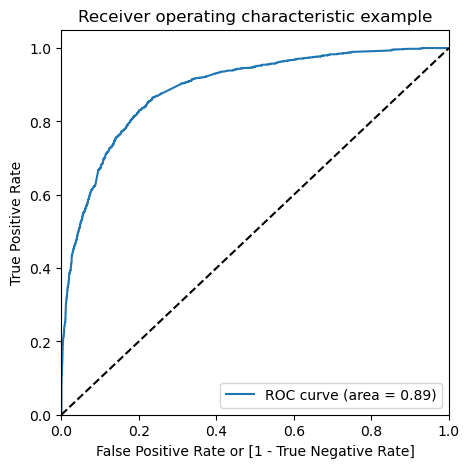

In [118]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

### Optimal Cutoff Point :

#### Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [119]:
# Now create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.192706         3009          0    1    1    0    0    0   
1          0        0.142751         1012          0    1    1    0    0    0   
2          0        0.246756         9226          0    1    1    1    0    0   
3          1        0.879785         4750          1    1    1    1    1    1   
4          1        0.736068         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    0  
4    1    1    1    0    0

In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.601165  0.973017  0.368246
0.2   0.2  0.759723  0.913737  0.663252
0.3   0.3  0.806015  0.851186  0.777721
0.4   0.4  0.813888  0.780458  0.834827
0.5   0.5  0.817667  0.710957  0.884507
0.6   0.6  0.802078  0.606296  0.924712
0.7   0.7  0.787120  0.529436  0.948528
0.8   0.8  0.767123  0.441946  0.970807
0.9   0.9  0.726500  0.309894  0.987452


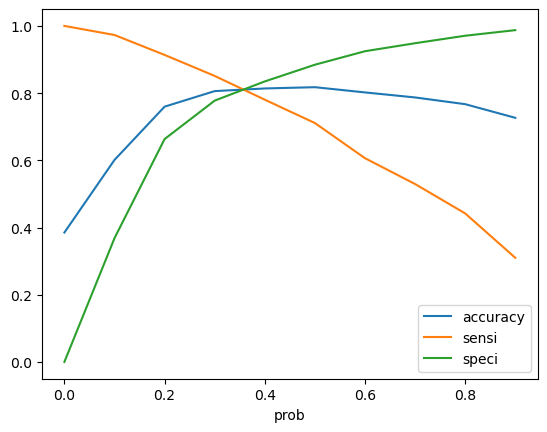

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.192706         3009          0    1    1    0    0    0   
1          0        0.142751         1012          0    1    1    0    0    0   
2          0        0.246756         9226          0    1    1    1    0    0   
3          1        0.879785         4750          1    1    1    1    1    1   
4          1        0.736068         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    1    0                1  
4    1    1    1    0    0                1

#### Assigning Lead Score to the Training data

In [123]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.192706         3009          0    1    1    0    0    0   
1          0        0.142751         1012          0    1    1    0    0    0   
2          0        0.246756         9226          0    1    1    1    0    0   
3          1        0.879785         4750          1    1    1    1    1    1   
4          1        0.736068         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0    0    0                0          19  
1    0    0    0    0    0                0          14  
2    0    0    0    0    0                0          25  
3    1    1    1    1    0                1          88  
4    1    1    1    0    0                1          74

## Step 8: Model Evaluation

In [124]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8105810108644308


In [125]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3130,  775],
       [ 428, 2018]], dtype=int64)

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8250204415372036


In [128]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8015364916773368


In [129]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19846350832266324


In [130]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7225205871822413


In [131]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.879707700955593


### Precision and Recall

* Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
* Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [132]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3454,  451],
       [ 707, 1739]], dtype=int64)

In [133]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7940639269406393


In [134]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7109566639411283


In [135]:
from sklearn.metrics import precision_score, recall_score

In [136]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7109566639411283


### Precision and recall tradeoff

In [137]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

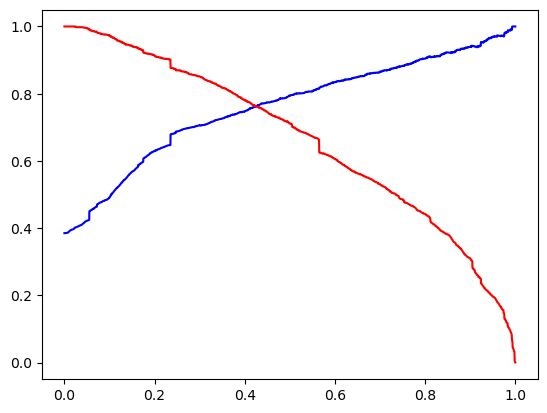

In [139]:
# plotting a trade-off curve between precision and recall

plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The above graph shows the trade-off between the Precision and Recall .

## Step 9: Making predictions on the test set


### Scaling the test data

In [140]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [141]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

Do Not Email  Do Not Call  Total Time Spent on Website  \
3271             0            0                    -0.600595   
1490             0            0                     1.887326   
7936             0            0                    -0.752879   
4216             0            0                    -0.888650   
3830             0            0                    -0.587751   

      Lead Origin_Landing Page Submission  Lead Source_Olark Chat  \
3271                                    0                       0   
1490                                    1                       0   
7936                                    0                       0   
4216                                    0                       0   
3830                                    1                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
3271                      0                             0   
1490                      0                             0   
7936                      0                             0   
4216                      1                             0   
3830                      0                             0   

      Last Activity_Email Opened  Last Activity_Olark Chat Conversation  \
3271                           1                                      0   
1490                           1                                      0   
7936                           1                                      0   
4216                           1                                      0   
3830                           1                                      0   

      Last Activity_Other_Activity  ...  Last Notable Activity_Email Bounced  \
3271                             0  ...                                    0   
1490                             0  ...                                    0   
7936                             0  ...                                    0   
4216                             0  ...                                    0   
3830                             0  ...                                    0   

      Last Notable Activity_Email Link Clicked  \
3271                                         0   
1490                                         0   
7936                                         0   
4216                                         0   
3830                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
3271                                   1                               0   
1490                                   1                               0   
7936                                   1                               0   
4216                                   0                               1   
3830                                   1                               0   

      Last Notable Activity_Olark Chat Conversation  \
3271                                              0   
1490                                              0   
7936                                              0   
4216                                              0   
3830                                              0   

      Last Notable Activity_Page Visited on Website  \
3271                                              0   
1490                                              0   
7936                                              0   
4216                                              0   
3830                                              0   

      Last Notable Activity_Resubscribed to emails  \
3271                                             0   
1490                                             0   
7936                                             0   
4216                                             0   
3830                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unsubscribed  \
3271                               0                                   0   
1490      

In [142]:
# Adding a const

X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.126064
1490    0.968306
7936    0.108742
4216    0.867376
3830    0.129818
1800    0.627258
6507    0.369739
4821    0.297847
4223    0.923556
4714    0.246756
dtype: float64

In [143]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [144]:
# Let's see the head
y_pred_1.head()

0
3271  0.126064
1490  0.968306
7936  0.108742
4216  0.867376
3830  0.129818

In [145]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [146]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [147]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [148]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [149]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         3271  0.126064
1          1         1490  0.968306
2          0         7936  0.108742
3          1         4216  0.867376
4          0         3830  0.129818

In [150]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [151]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [152]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_prob
0         3271          0        0.126064
1         1490          1        0.968306
2         7936          0        0.108742
3         4216          1        0.867376
4         3830          0        0.129818

In [153]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [154]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob  final_predicted
0         3271          0        0.126064                0
1         1490          1        0.968306                1
2         7936          0        0.108742                0
3         4216          1        0.867376                1
4         3830          0        0.129818                0

In [155]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8020565552699229


In [156]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1385,  349],
       [ 190,  799]], dtype=int64)

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.80788675429727


In [159]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7987312572087658


#### Assigning Lead Score to the Testing data

In [160]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

Prospect ID  Converted  Converted_prob  final_predicted  Lead_Score
0         3271          0        0.126064                0          13
1         1490          1        0.968306                1          97
2         7936          0        0.108742                0          11
3         4216          1        0.867376                1          87
4         3830          0        0.129818                0          13

## Result & Conculsion :

### Train Data :-
Accuracy : 0.81 = 81 % ;
Sensitivity : 0.82 = 82 % ;
Specificity : 0.80 = 80 %

### Test Data :-
Accuracy : 0.80 = 80 % ;
Sensitivity : 0.80 = 80 % ;
Specificity : 0.79 = 79 %